In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.figure_factory._county_choropleth import create_choropleth

In [58]:
#COLORS
DEM_COLOR = 'blue'
REP_COLOR = 'red'
LIB_COLOR = 'green'
CST_COLOR = 'yellow'
GRE_COLOR = 'gray'

In [59]:
FILEPATH = 'results_pct_20201103.txt'

In [60]:
results_data = pd.read_csv(FILEPATH, sep="\t")
results_data.shape

(236378, 15)

In [ ]:
results_data['Contest Name'].shape


In [61]:
matters = results_data[results_data['Contest Name'].isin(['US PRESIDENT', 'NC GOVERNOR', 'US SENATE'])]
party_colors = {'DEM': DEM_COLOR, 'REP': REP_COLOR, 'LIB': LIB_COLOR, 'CST': CST_COLOR, 'GRE': GRE_COLOR}
matters['Party Color'] = matters['Choice Party'].map(party_colors) 

In [ ]:
matters.tail()

In [62]:
matters = matters.sort_values(by=['County'])
matters.head()

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Party Color
115459,ALAMANCE,11/03/2020,124,1373,S,US PRESIDENT,Write-In (Miscellaneous),NaN,1,1,3,0,0,4,Y,NaN
66417,ALAMANCE,11/03/2020,08S,1373,S,US PRESIDENT,Howie Hawkins,GRE,1,2,1,1,0,4,Y,gray
196948,ALAMANCE,11/03/2020,12N,1169,S,NC GOVERNOR,Roy Cooper,DEM,1,379,1194,266,0,1839,Y,blue
215841,ALAMANCE,11/03/2020,129,1374,S,US SENATE,Cal Cunningham,DEM,1,65,302,144,0,511,Y,blue
215912,ALAMANCE,11/03/2020,03S,1374,S,US SENATE,Thom Tillis,REP,1,387,1815,311,0,2513,Y,red


## Total Votes by Party - US PRESIDENT 

In [63]:
total_votes_party_president = matters[matters['Contest Name'] == 'US PRESIDENT'].groupby(['Contest Group ID', 'Choice', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['Total Votes'], ascending=False)
total_votes_party_president

,Contest Group ID,Choice,Choice Party,Party Color,Total Votes
1,1373,Donald J. Trump,REP,red,2732084
4,1373,Joseph R. Biden,DEM,blue,2655383
3,1373,Jo Jorgensen,LIB,green,47215
2,1373,Howie Hawkins,GRE,gray,11825
0,1373,Don Blankenship,CST,yellow,7381


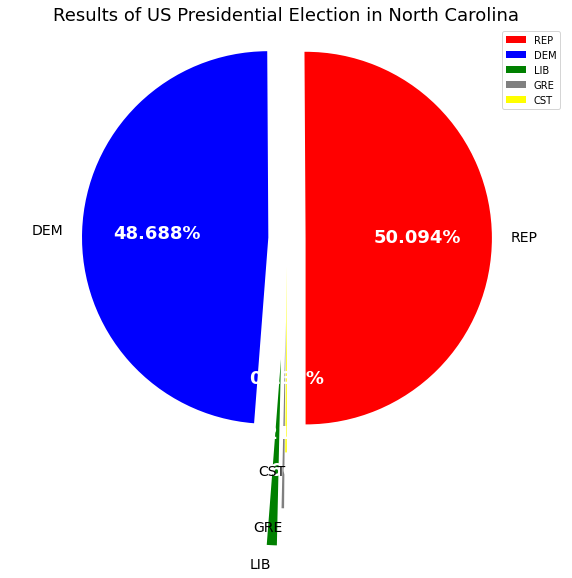

In [64]:
labels = list(total_votes_party_president['Choice Party'])
colors = list(total_votes_party_president['Party Color'])
explode = (0.1, 0.1, 0.65, 0.45, 0.15) 

fig1, ax1 = plt.subplots(figsize=[10,10])

patches, texts, autotexts = ax1.pie(total_votes_party_president['Total Votes'], explode=explode, labels=labels, colors= colors
                          , autopct='%1.3f%%', shadow=False, startangle=270)

for text in texts:
    text.set(fontsize=14)

for autotext in autotexts:
    autotext.set(color='white', fontsize=18, weight='bold', ha='center')

plt.title('Results of US Presidential Election in North Carolina', fontsize=18)
ax1.axis('equal')
plt.legend()

plt.show()

## Total Votes by Party - NC GOVERNOR

In [65]:
total_votes_party_governor = matters[matters['Contest Name'] == 'NC GOVERNOR'].groupby(['Contest Group ID', 'Choice', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['Total Votes'], ascending=False)
total_votes_party_governor

,Contest Group ID,Choice,Choice Party,Party Color,Total Votes
2,1169,Roy Cooper,DEM,blue,2803782
1,1169,Dan Forest,REP,red,2563258
3,1169,Steven J. DiFiore,LIB,green,58818
0,1169,Al Pisano,CST,yellow,20371


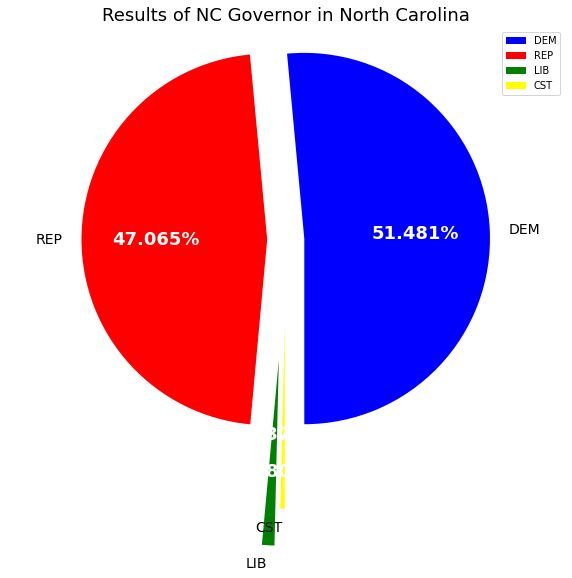

In [66]:
labels = list(total_votes_party_governor['Choice Party'])
colors = list(total_votes_party_governor['Party Color'])
explode = (0.1, 0.1, 0.65, 0.45) 

fig1, ax1 = plt.subplots(figsize=[10,10])

patches, texts, autotexts = ax1.pie(total_votes_party_governor['Total Votes'], explode=explode, labels=labels, colors= colors
                          , autopct='%1.3f%%', shadow=False, startangle=270)

for patch in patches:
    patch.set_animated(True)

for text in texts:
    text.set(fontsize=14)

for autotext in autotexts:
    autotext.set(color='white', fontsize=18, weight='bold', ha='center')

plt.title('Results of NC Governor in North Carolina', fontsize=18)
ax1.axis('equal')
plt.legend()

plt.show()

## REFERENCE DATASETS -  FIPS Data  

In [204]:

state_geocodes = pd.read_excel('state-geocodes-v2019.xlsx', header=0, skiprows=5)
all_geocodes = pd.read_excel('all-geocodes-v2019.xlsx', header=0, skiprows=4)

def format_county_codes(code):
    if len(code) < 3:
        return code.zfill(3)
    return code

def format_state_codes(code):
    if len(code) < 2:
        return code.zfill(2)
    return code


all_geocodes['state_fips_codes'] = all_geocodes['State Code (FIPS)'].map(lambda x : format_state_codes(str(x)))
all_geocodes['county_fips_codes'] = all_geocodes['County Code (FIPS)'].map(lambda x : format_county_codes(str(x)))
all_geocodes['combined_fips_code'] = all_geocodes['state_fips_codes'] + all_geocodes['county_fips_codes']
all_geocodes.reindex(columns=['combined_fips_codes'])

# Create a Fips Map for County
fips_ref_data = all_geocodes.loc[:,['Area Name (including legal/statistical area description)', 'state_fips_codes', 'county_fips_codes', 'combined_fips_code']]
fips_ref_data.columns = ['area_name', 'state_fips_codes', 'county_fips_codes', 'combined_fips_code' ]
fips_ref_data = fips_ref_data[fips_ref_data['area_name'].map(lambda area: 'County' in area)]
fips_ref_data['county_name'] = fips_ref_data['area_name'].map(lambda county: county.split(' ')[0].upper())


# Create a Map for state code to state name
state_fips_codes_map = all_geocodes[(all_geocodes['State Code (FIPS)'] != 0) & (all_geocodes['County Code (FIPS)'] == 0) & (all_geocodes['County Subdivision Code (FIPS)'] == 0) & 
             (all_geocodes['Place Code (FIPS)'] == 0) & (all_geocodes['Consolidtated City Code (FIPS)'] == 0)].loc[:, ['State Code (FIPS)', 'Area Name (including legal/statistical area description)']]
state_fips_codes_map.columns = ['state_fips_code', 'state_name']
state_fips_codes_map['state_fips_code'] = state_fips_codes_map['state_fips_code'].map(lambda x: str(format_state_codes(str(x))))
state_fips = state_fips_codes_map.set_index('state_fips_code')['state_name'].to_dict()
fips_ref_data['state_name'] = fips_ref_data['state_fips_codes'].map(lambda state: state_fips[state])

In [206]:
state_fips_modified = dict((v,k) for k,v in state_fips.items())
state_fips_modified

{'Alabama': '01',
 'Alaska': '02',
 'Arizona': '04',
 'Arkansas': '05',
 'California': '06',
 'Colorado': '08',
 'Connecticut': '09',
 'Delaware': '10',
 'District of Columbia': '11',
 'Florida': '12',
 'Georgia': '13',
 'Hawaii': '15',
 'Idaho': '16',
 'Illinois': '17',
 'Indiana': '18',
 'Iowa': '19',
 'Kansas': '20',
 'Kentucky': '21',
 'Louisiana': '22',
 'Maine': '23',
 'Maryland': '24',
 'Massachusetts': '25',
 'Michigan': '26',
 'Minnesota': '27',
 'Mississippi': '28',
 'Missouri': '29',
 'Montana': '30',
 'Nebraska': '31',
 'Nevada': '32',
 'New Hampshire': '33',
 'New Jersey': '34',
 'New Mexico': '35',
 'New York': '36',
 'North Carolina': '37',
 'North Dakota': '38',
 'Ohio': '39',
 'Oklahoma': '40',
 'Oregon': '41',
 'Pennsylvania': '42',
 'Rhode Island': '44',
 'South Carolina': '45',
 'South Dakota': '46',
 'Tennessee': '47',
 'Texas': '48',
 'Utah': '49',
 'Vermont': '50',
 'Virginia': '51',
 'Washington': '53',
 'West Virginia': '54',
 'Wisconsin': '55',
 'Wyoming': '56

In [ ]:

fips_ref_data

## Total Votes by Party per County - US PRESIDENT

In [207]:
fips = fips_ref_data[fips_ref_data['state_fips_codes'] == state_fips_modified['North Carolina']].loc[:, ['county_name', 'combined_fips_code']]
fips

,county_name,combined_fips_code
25560,ALAMANCE,37001
25561,ALEXANDER,37003
25562,ALLEGHANY,37005
25563,ANSON,37007
25564,ASHE,37009
...,...,...
25655,WAYNE,37191
25656,WILKES,37193
25657,WILSON,37195
25658,YADKIN,37197


In [200]:
matters

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Party Color
115459,ALAMANCE,11/03/2020,124,1373,S,US PRESIDENT,Write-In (Miscellaneous),NaN,1,1,3,0,0,4,Y,NaN
66417,ALAMANCE,11/03/2020,08S,1373,S,US PRESIDENT,Howie Hawkins,GRE,1,2,1,1,0,4,Y,gray
196948,ALAMANCE,11/03/2020,12N,1169,S,NC GOVERNOR,Roy Cooper,DEM,1,379,1194,266,0,1839,Y,blue
215841,ALAMANCE,11/03/2020,129,1374,S,US SENATE,Cal Cunningham,DEM,1,65,302,144,0,511,Y,blue
215912,ALAMANCE,11/03/2020,03S,1374,S,US SENATE,Thom Tillis,REP,1,387,1815,311,0,2513,Y,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51631,YANCEY,11/03/2020,06 JAC,1169,S,NC GOVERNOR,Dan Forest,REP,1,158,559,61,0,778,Y,red
230747,YANCEY,11/03/2020,06 JAC,1374,S,US SENATE,Cal Cunningham,DEM,1,43,246,81,0,370,Y,blue
52019,YANCEY,11/03/2020,01 BUR,1374,S,US SENATE,Kevin E. Hayes,CST,1,7,25,3,0,35,Y,yellow
142677,YANCEY,11/03/2020,11 PRI,1373,S,US PRESIDENT,Don Blankenship,CST,1,0,0,2,0,2,Y,yellow


In [208]:
total_votes_by_county_president = matters[matters['Contest Name'] == 'US PRESIDENT'].groupby(['County', 'Choice Party', 'Party Color'])['Total Votes'].sum().reset_index().sort_values(by=['County', 'Total Votes'], ascending=False)
total_votes_by_county_president['state_name'] = 'North Carolina'

In [209]:
total_votes_by_county_president

,County,Choice Party,Party Color,Total Votes,state_name
499,YANCEY,REP,red,7481,North Carolina
496,YANCEY,DEM,blue,3678,North Carolina
498,YANCEY,LIB,green,78,North Carolina
497,YANCEY,GRE,gray,27,North Carolina
495,YANCEY,CST,yellow,18,North Carolina
...,...,...,...,...,...
4,ALAMANCE,REP,red,45490,North Carolina
1,ALAMANCE,DEM,blue,38186,North Carolina
3,ALAMANCE,LIB,green,667,North Carolina
2,ALAMANCE,GRE,gray,220,North Carolina


In [210]:
total_votes_by_county_president_enriched = pd.merge(total_votes_by_county_president, fips_ref_data, left_on=['County', 'state_name'], right_on=['county_name', 'state_name'])
total_votes_by_county_president_enriched.head()

,County,Choice Party,Party Color,Total Votes,state_name,area_name,state_fips_codes,county_fips_codes,combined_fips_code,county_name
0,YANCEY,REP,red,7481,North Carolina,Yancey County,37,199,37199,YANCEY
1,YANCEY,DEM,blue,3678,North Carolina,Yancey County,37,199,37199,YANCEY
2,YANCEY,LIB,green,78,North Carolina,Yancey County,37,199,37199,YANCEY
3,YANCEY,GRE,gray,27,North Carolina,Yancey County,37,199,37199,YANCEY
4,YANCEY,CST,yellow,18,North Carolina,Yancey County,37,199,37199,YANCEY


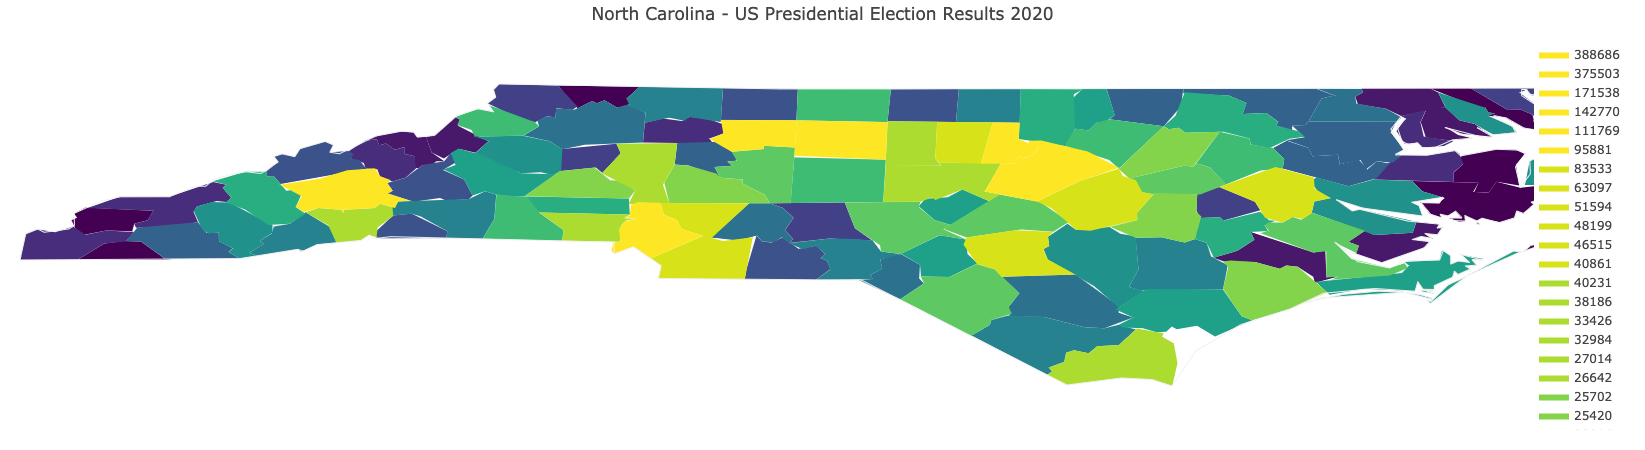

In [212]:

# df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
# df_sample_r = df_sample[df_sample['STNAME'] == 'North Carolina']

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['Total Votes']
# fips = total_votes_by_county_president_enriched['combined_fips_code']

fips=total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['combined_fips_code']

# colorscale = [
#     'rgb(193, 193, 193)',
#     'rgb(239,239,239)',
#     'rgb(195, 196, 222)',
#     'rgb(144,148,194)',
#     'rgb(101,104,168)',
#     'rgb(65, 53, 132)'
# ]

fig = create_choropleth(
    fips=fips, values=values, scope=['NC'], title='North Carolina - US Presidential Election Results 2020'
)

# fig = create_choropleth(
#     fips=fips, values=values, scope=['NC'],
#     binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
#     county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
#     legend_title='Population by County', title='California and Nearby States'
# )
fig.layout.template = None
fig.show()

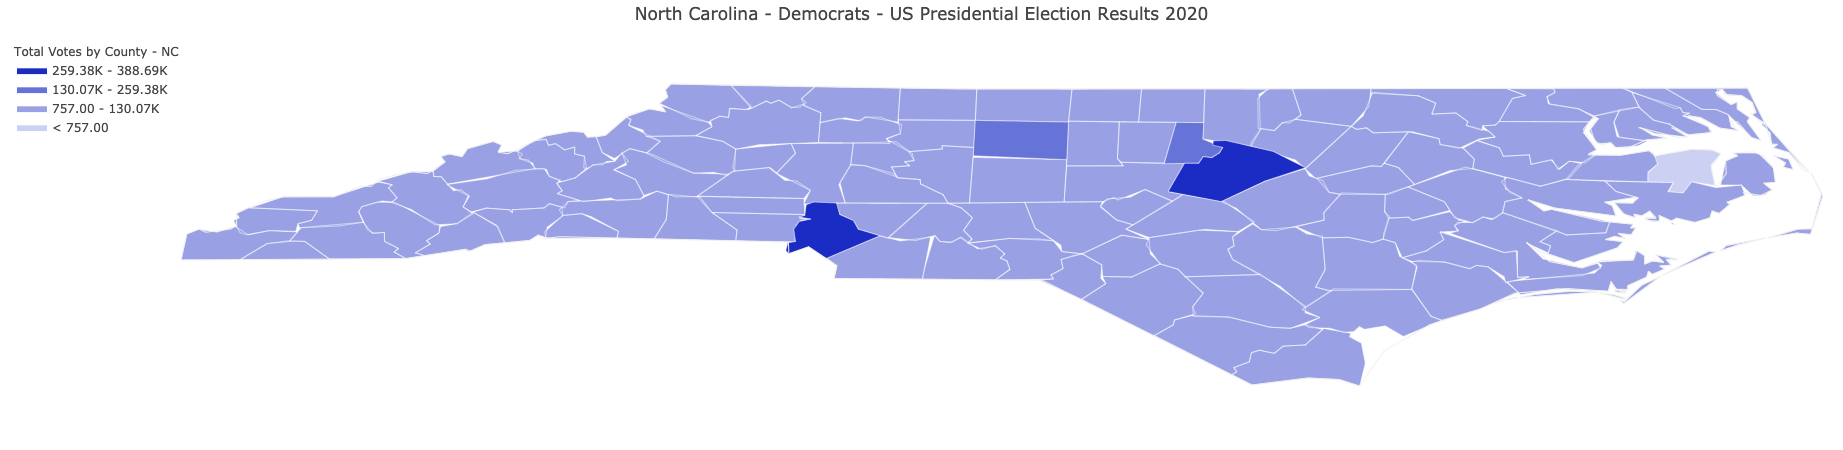

In [249]:
# Democratic Vote - US President

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['Total Votes']
fips = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'DEM']['combined_fips_code']


endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#CCD0F2","#99A1E4","#6673D7","#1A2CC3","#0015BC"]
fig = create_choropleth(
    fips=fips, values=values, scope=['North Carolina'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
    title='North Carolina - Democrats - US Presidential Election Results 2020',
#     county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True
)


fig.update_layout(
    legend_title='Total Votes by County - NC',
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)



fig.layout.template = None
fig.show()

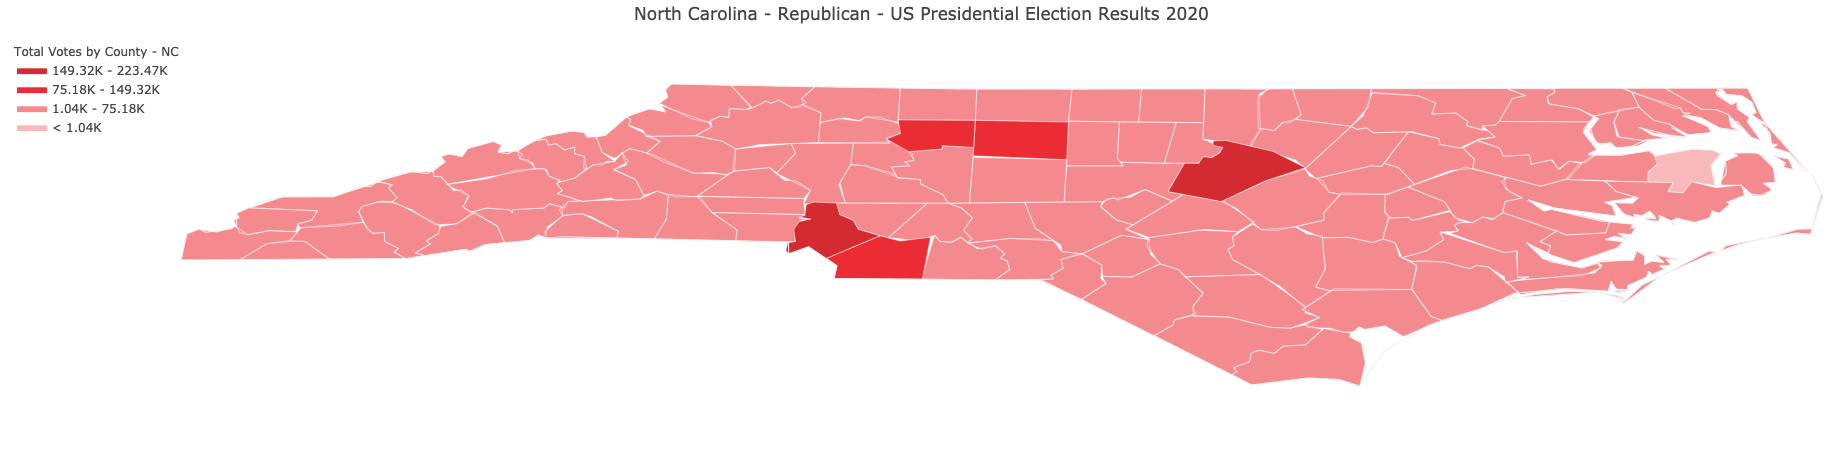

In [251]:
# Republican Vote - US President

values = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'REP']['Total Votes']
fips = total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'] == 'REP']['combined_fips_code']


endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#F8B9BB", "#F48A8E","#EB2C34", "#D42A31", "#E9141D"]
fig = create_choropleth(
    fips=fips, values=values, scope=['North Carolina'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
#     plot_bgcolor='rgb(229,229,229)',
#     paper_bgcolor='rgb(229,229,229)',
    title='North Carolina - Republican - US Presidential Election Results 2020',
#     county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True
)


fig.update_layout(
    legend_title='Total Votes by County - NC',
    legend_x = 0,
    annotations = {'x': -0.12, 'xanchor': 'left'}
)



fig.layout.template = None
fig.show()

In [253]:
total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['County']=='WILSON']

,County,Choice Party,Party Color,Total Votes,state_name,area_name,state_fips_codes,county_fips_codes,combined_fips_code,county_name
10,WILSON,DEM,blue,20579,North Carolina,Wilson County,37,195,37195,WILSON
11,WILSON,REP,red,19437,North Carolina,Wilson County,37,195,37195,WILSON
12,WILSON,LIB,green,242,North Carolina,Wilson County,37,195,37195,WILSON
13,WILSON,GRE,gray,55,North Carolina,Wilson County,37,195,37195,WILSON
14,WILSON,CST,yellow,39,North Carolina,Wilson County,37,195,37195,WILSON


In [255]:
total_votes_by_county_president_enriched[total_votes_by_county_president_enriched['Choice Party'].isin(['DEM', 'REP'])]
# Work on windowing functions to extract the party with highest votes per county

,County,Choice Party,Party Color,Total Votes,state_name,area_name,state_fips_codes,county_fips_codes,combined_fips_code,county_name
0,YANCEY,REP,red,7481,North Carolina,Yancey County,37,199,37199,YANCEY
1,YANCEY,DEM,blue,3678,North Carolina,Yancey County,37,199,37199,YANCEY
5,YADKIN,REP,red,15861,North Carolina,Yadkin County,37,197,37197,YADKIN
6,YADKIN,DEM,blue,3744,North Carolina,Yadkin County,37,197,37197,YADKIN
10,WILSON,DEM,blue,20579,North Carolina,Wilson County,37,195,37195,WILSON
...,...,...,...,...,...,...,...,...,...,...
481,ALLEGHANY,DEM,blue,1480,North Carolina,Alleghany County,37,005,37005,ALLEGHANY
485,ALEXANDER,REP,red,15806,North Carolina,Alexander County,37,003,37003,ALEXANDER
486,ALEXANDER,DEM,blue,4113,North Carolina,Alexander County,37,003,37003,ALEXANDER
490,ALAMANCE,REP,red,45490,North Carolina,Alamance County,37,001,37001,ALAMANCE


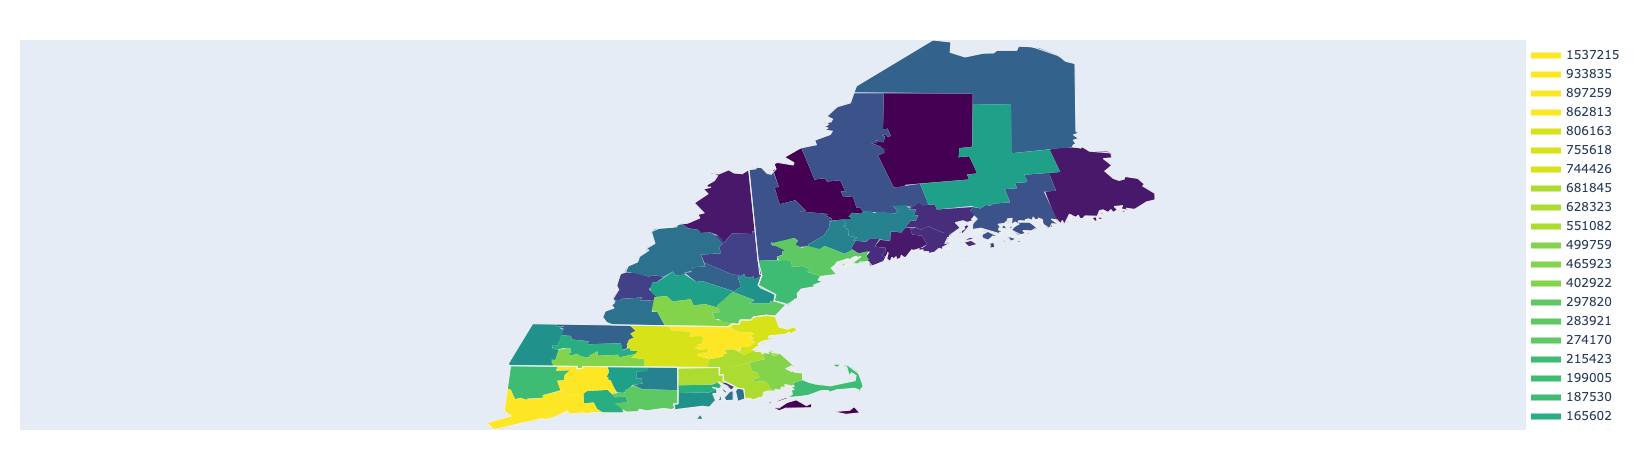

In [115]:
import plotly.figure_factory as ff

import pandas as pd

NE_states = ['Connecticut', 'Maine', 'Massachusetts',
            'New Hampshire', 'Rhode Island']
df_sample = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv'
)
df_sample_r = df_sample[df_sample['STNAME'].isin(NE_states)]
colorscale = ['rgb(68.0, 1.0, 84.0)',
'rgb(66.0, 64.0, 134.0)',
'rgb(38.0, 130.0, 142.0)',
'rgb(63.0, 188.0, 115.0)',
'rgb(216.0, 226.0, 25.0)']

values_eg = df_sample_r['TOT_POP'].tolist()
fips_eg = df_sample_r['FIPS'].tolist()
fig = ff.create_choropleth(
    fips=fips_eg, values=values_eg, scope=NE_states, show_state_data=True
)
fig.show()

In [120]:
fips_eg

[23001,
 23003,
 23005,
 23007,
 23009,
 23011,
 23013,
 23015,
 23017,
 23019,
 23021,
 23023,
 23025,
 23027,
 23029,
 23031,
 25001,
 25003,
 25005,
 25007,
 25009,
 25011,
 25013,
 25015,
 25017,
 25019,
 25021,
 25023,
 25025,
 25027,
 33001,
 33003,
 33005,
 33007,
 33009,
 33011,
 33013,
 33015,
 33017,
 33019,
 44001,
 44003,
 44005,
 44007,
 44009,
 9001,
 9003,
 9005,
 9007,
 9009,
 9011,
 9013,
 9015]

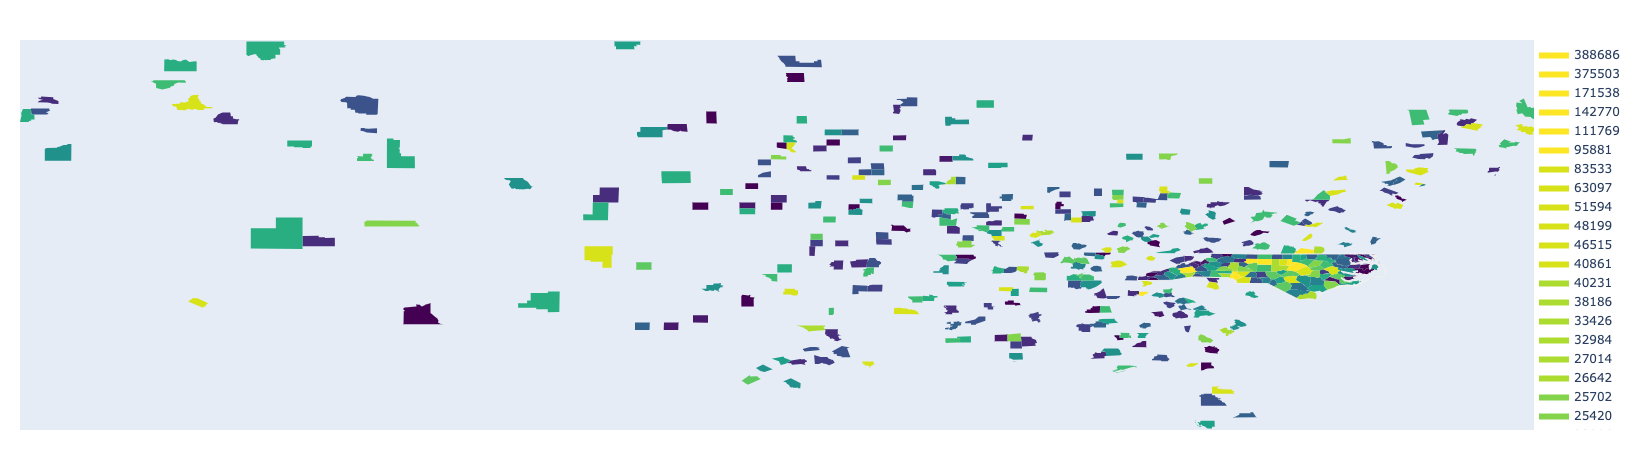

In [198]:
import plotly.figure_factory as ff

import pandas as pd

NE_states = ['North Carolina']
df_sample = total_votes_by_county_president_enriched
df_sample_r = df_sample[df_sample['Choice Party']== 'DEM']
colorscale = ['rgb(68.0, 1.0, 84.0)',
'rgb(66.0, 64.0, 134.0)',
'rgb(38.0, 130.0, 142.0)',
'rgb(63.0, 188.0, 115.0)',
'rgb(216.0, 226.0, 25.0)']

values_eg = df_sample_r['Total Votes'].tolist()
fips_eg = df_sample_r['combined_fips_code'].map(lambda x: remove_leading_zero(x)).tolist()
fig = ff.create_choropleth(
    fips=fips_eg, values=values_eg, scope=NE_states, show_state_data=True
)
fig.show()

In [123]:
df_sample_r['combined_fips_code'].map(lambda x: x[1:] if x[0] == '0')

SyntaxError: invalid syntax (<ipython-input-123-1541a92273a0>, line 1)

In [124]:
def remove_leading_zero(code):
    if code[0] == '0':
        return code[1:]
    return code

In [125]:
remove_leading_zero('0900')

'900'

In [199]:
df_sample_r.head()

,County,Choice Party,Party Color,Total Votes,area_name,state_fips_codes,county_fips_codes,combined_fips_code,county_name,state_name
1,YANCEY,DEM,blue,3678,Yancey County,37,199,37199,YANCEY,North Carolina
6,YADKIN,DEM,blue,3744,Yadkin County,37,197,37197,YADKIN,North Carolina
10,WILSON,DEM,blue,20579,Wilson County,20,205,20205,WILSON,Kansas
11,WILSON,DEM,blue,20579,Wilson County,37,195,37195,WILSON,North Carolina
12,WILSON,DEM,blue,20579,Wilson County,47,189,47189,WILSON,Tennessee


In [109]:
values.head()

1      3678
6      3744
10    20579
11    20579
12    20579
Name: Total Votes, dtype: int64

In [84]:
cleaned_fips = fips_ref_data[fips_ref_data['area_name'].map(lambda x: 'County' in x)]
cleaned_fips                                             

,area_name,state_fips_codes,county_fips_codes,combined_fips_code
2,Autauga County,01,001,01001
3,Baldwin County,01,003,01003
4,Barbour County,01,005,01005
5,Bibb County,01,007,01007
6,Blount County,01,009,01009
...,...,...,...,...
43664,Sweetwater County,56,037,56037
43665,Teton County,56,039,56039
43666,Uinta County,56,041,56041
43667,Washakie County,56,043,56043


In [ ]:
"yeshes county"